### This notebook is trying to calculate the number of unhoused individuals per toilet by census tract.

In [63]:
import pandas as pd
import geopandas as gpd

In [64]:
#upload toilet data
toilets = gpd.read_file('alltoilets.geojson')

In [65]:
#upload homeless data count
counts = gpd.read_file('homelesscount_tracts.geojson').to_crs('EPSG:4326')

In [66]:
#left join, intersects
joinedGdf = gpd.sjoin(counts, toilets, how='left', predicate = 'intersects')
joinedGdf.head()

,short_geoid,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,geometry,index_right,name,type,branch_name
0,911001,4025735684.42,9110.01,6620403.0,911001,1998891.0,06037911001,353933.808192,4087.0,30.0,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",NaN,NaN,NaN,NaN
1,980003,2078689856.02,9800.03,6575300.0,980003,2112006.0,06037980003,273188.86321,0.0,925.0,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",NaN,NaN,NaN,NaN
2,930301,11118018325.1,9303.01,6603027.0,930301,1932124.0,06037930301,628603.531323,869.0,928.0,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",NaN,NaN,NaN,NaN
3,573003,4824001.88224,5730.03,6500215.0,573003,1747305.0,06037573003,9050.00845755,2016.0,2.0,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",NaN,NaN,NaN,NaN
4,297602,6697030.7108,2976.02,6473372.0,297602,1719119.0,06037297602,12308.3153848,4005.0,64.0,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",NaN,NaN,NaN,NaN


Putting this join to the side. I will need it later, but first I should figure out how many toilets per census tract. (I couldn't think of creative names for new joined GDFs, so apologies for the boring names!)

In [81]:
#right join to the toilets, so drops all census tracts w/o toilets
joinedGdf2 = gpd.sjoin(counts, toilets, how='right', predicate='intersects')

In [82]:
joinedGdf2.head()

,index_left,short_geoid,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,name,type,branch_name,geometry
0,1005,227020,4737436.15289,2270.20,6485320.0,227020,1828211.0,06037227020,9166.08039067,3661.0,1409.0,Augustus F. Hawkins Natural Park,LA Parks,None,POINT (-118.24786 34.01386)
1,1311,189201,3505709.45632,1892.01,6472011.0,189201,1860210.0,06037189201,7950.84190484,3285.0,237.0,Bird Sanctuary,LA Parks,None,POINT (-118.29180 34.10518)
2,1605,980010,41237448.8931,9800.10,6489193.0,980010,1851594.0,06037980010,36575.8989666,139.0,1922.0,Bishop Canyon,LA Parks,None,POINT (-118.23659 34.07990)
3,600,109100,29141105.7189,1091.00,6421750.0,109100,1923572.0,06037109100,26339.6270442,2642.0,1775.0,Brand Park,LA Parks,None,POINT (-118.46116 34.27229)
4,1370,119001,11480241.263,1190.01,6435286.0,119001,1907177.0,06037119001,13913.027718,3941.0,438.0,Branford Recreation Center,LA Parks,None,POINT (-118.42319 34.23351)


In [83]:
#count the number of toilets per census tract
#creates a series
n_toilets = joinedGdf2.groupby('short_geoid').size()

#convert the series into a df
n_TOILETS=pd.DataFrame(n_toilets)

In [84]:
#rename the column to something that makes more sense
n_TOILETS.columns = ['number_toilets']

In [71]:
#bring back the original joinedGdf
#set index in preparation of joining n_TOILETS
joinedGdf.set_index('short_geoid', inplace=True)

In [72]:
#join
joinedGdf3=joinedGdf.join(n_TOILETS)

In [73]:
#fill all NaN's with zero
joinedGdf3['number_toilets'] = joinedGdf3['number_toilets'].fillna(0)

In [74]:
joinedGdf3.head()

,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,geometry,index_right,name,type,branch_name,number_toilets
short_geoid,,,,,,,,,,,,,,,
101110,12295652.6944,1011.10,6473137.0,101110,1916938.0,06037101110,15083.8543322,4824.0,1463.0,"MULTIPOLYGON (((-118.29792 34.26322, -118.2969...",369.0,None,LA City Library,Sunland - Tujunga,1.0
101122,28457712.2343,1011.22,6474004.0,101122,1919937.0,06037101122,31671.4558884,3291.0,671.0,"MULTIPOLYGON (((-118.27742 34.25990, -118.2774...",NaN,NaN,NaN,NaN,0.0
101210,7003370.52469,1012.10,6473812.0,101210,1914571.0,06037101210,12066.77064,5882.0,1445.0,"MULTIPOLYGON (((-118.28592 34.25589, -118.2859...",NaN,NaN,NaN,NaN,0.0
101220,7522986.29954,1012.20,6476560.0,101220,1914066.0,06037101220,12697.6262999,2902.0,1703.0,"MULTIPOLYGON (((-118.27817 34.25577, -118.2782...",NaN,NaN,NaN,NaN,0.0
101300,27772933.9487,1013.00,6479771.0,101300,1913027.0,06037101300,29383.7012162,4410.0,1578.0,"MULTIPOLYGON (((-118.26526 34.25238, -118.2653...",NaN,NaN,NaN,NaN,0.0


In [75]:
joinedGdf3['toilet_ratio'] = joinedGdf3['homeless_count']/joinedGdf3['number_toilets']
joinedGdf3.head()

,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,geometry,index_right,name,type,branch_name,number_toilets,toilet_ratio
short_geoid,,,,,,,,,,,,,,,,
101110,12295652.6944,1011.10,6473137.0,101110,1916938.0,06037101110,15083.8543322,4824.0,1463.0,"MULTIPOLYGON (((-118.29792 34.26322, -118.2969...",369.0,None,LA City Library,Sunland - Tujunga,1.0,1463.0
101122,28457712.2343,1011.22,6474004.0,101122,1919937.0,06037101122,31671.4558884,3291.0,671.0,"MULTIPOLYGON (((-118.27742 34.25990, -118.2774...",NaN,NaN,NaN,NaN,0.0,inf
101210,7003370.52469,1012.10,6473812.0,101210,1914571.0,06037101210,12066.77064,5882.0,1445.0,"MULTIPOLYGON (((-118.28592 34.25589, -118.2859...",NaN,NaN,NaN,NaN,0.0,inf
101220,7522986.29954,1012.20,6476560.0,101220,1914066.0,06037101220,12697.6262999,2902.0,1703.0,"MULTIPOLYGON (((-118.27817 34.25577, -118.2782...",NaN,NaN,NaN,NaN,0.0,inf
101300,27772933.9487,1013.00,6479771.0,101300,1913027.0,06037101300,29383.7012162,4410.0,1578.0,"MULTIPOLYGON (((-118.26526 34.25238, -118.2653...",NaN,NaN,NaN,NaN,0.0,inf


I didn't get a chance to map this out. I think maybe change the infinities to zero again?

In [76]:
# Replacing all inf values in the dataframe with zero

import numpy as np
joinedGdf3 = joinedGdf3.replace([np.inf, -np.inf], 0)

In [77]:
joinedGdf3.head()

,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,geometry,index_right,name,type,branch_name,number_toilets,toilet_ratio
short_geoid,,,,,,,,,,,,,,,,
101110,12295652.6944,1011.10,6473137.0,101110,1916938.0,06037101110,15083.8543322,4824.0,1463.0,"MULTIPOLYGON (((-118.29792 34.26322, -118.2969...",369.0,None,LA City Library,Sunland - Tujunga,1.0,1463.0
101122,28457712.2343,1011.22,6474004.0,101122,1919937.0,06037101122,31671.4558884,3291.0,671.0,"MULTIPOLYGON (((-118.27742 34.25990, -118.2774...",NaN,NaN,NaN,NaN,0.0,0.0
101210,7003370.52469,1012.10,6473812.0,101210,1914571.0,06037101210,12066.77064,5882.0,1445.0,"MULTIPOLYGON (((-118.28592 34.25589, -118.2859...",NaN,NaN,NaN,NaN,0.0,0.0
101220,7522986.29954,1012.20,6476560.0,101220,1914066.0,06037101220,12697.6262999,2902.0,1703.0,"MULTIPOLYGON (((-118.27817 34.25577, -118.2782...",NaN,NaN,NaN,NaN,0.0,0.0
101300,27772933.9487,1013.00,6479771.0,101300,1913027.0,06037101300,29383.7012162,4410.0,1578.0,"MULTIPOLYGON (((-118.26526 34.25238, -118.2653...",NaN,NaN,NaN,NaN,0.0,0.0


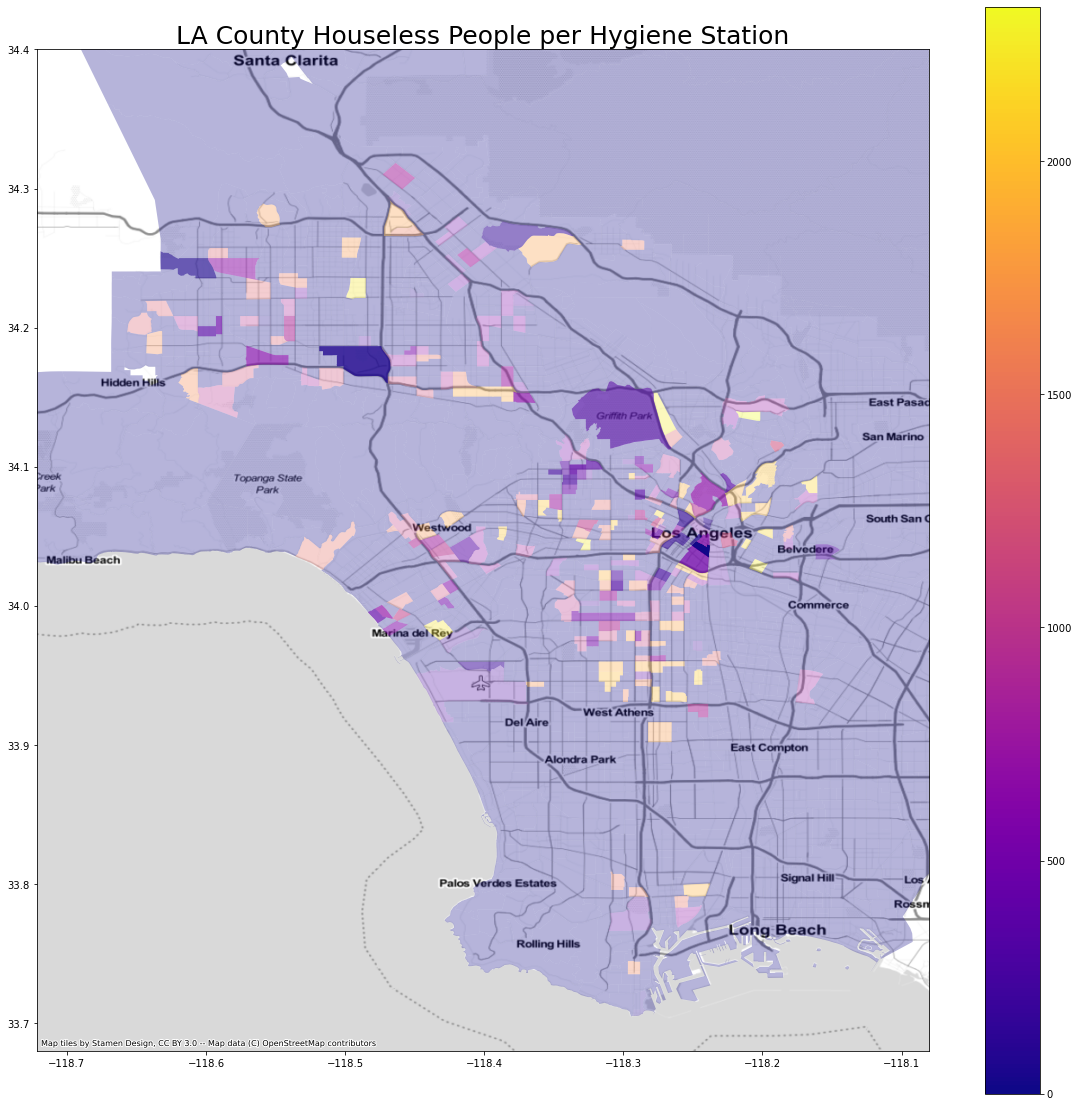

In [78]:
# Mapping
import matplotlib.pyplot as plt
import contextily as ctx

#LA county wide map

f, ax = plt.subplots(figsize=(20,20))

joinedGdf3.plot('toilet_ratio', 
            ax=ax, 
            cmap='plasma', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')
ax.set_xlim([-118.721783, -118.08]) 
ax.set_ylim([33.68, 34.4])
ax.set_title('LA County Houseless People per Hygiene Station', fontsize=25)

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

plt.show()

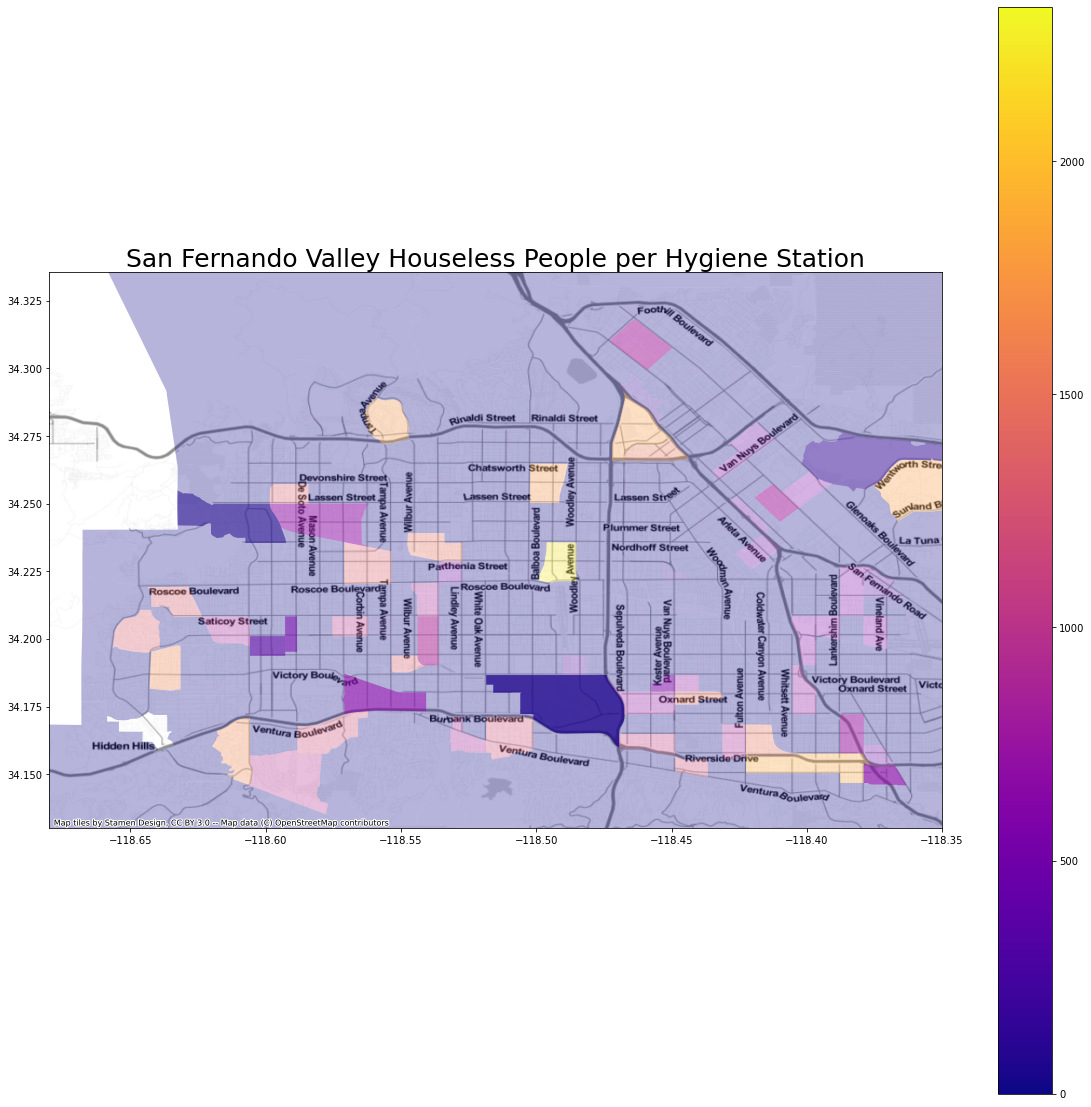

In [79]:
# The Valley 

f, ax = plt.subplots(figsize=(20,20))

joinedGdf3.plot('toilet_ratio', 
            ax=ax, 
            cmap='plasma', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')
ax.set_xlim([-118.68, -118.35]) 
ax.set_ylim([34.13, 34.335567])
ax.set_title('San Fernando Valley Houseless People per Hygiene Station', fontsize=25)

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite, zoom=12)

plt.show()

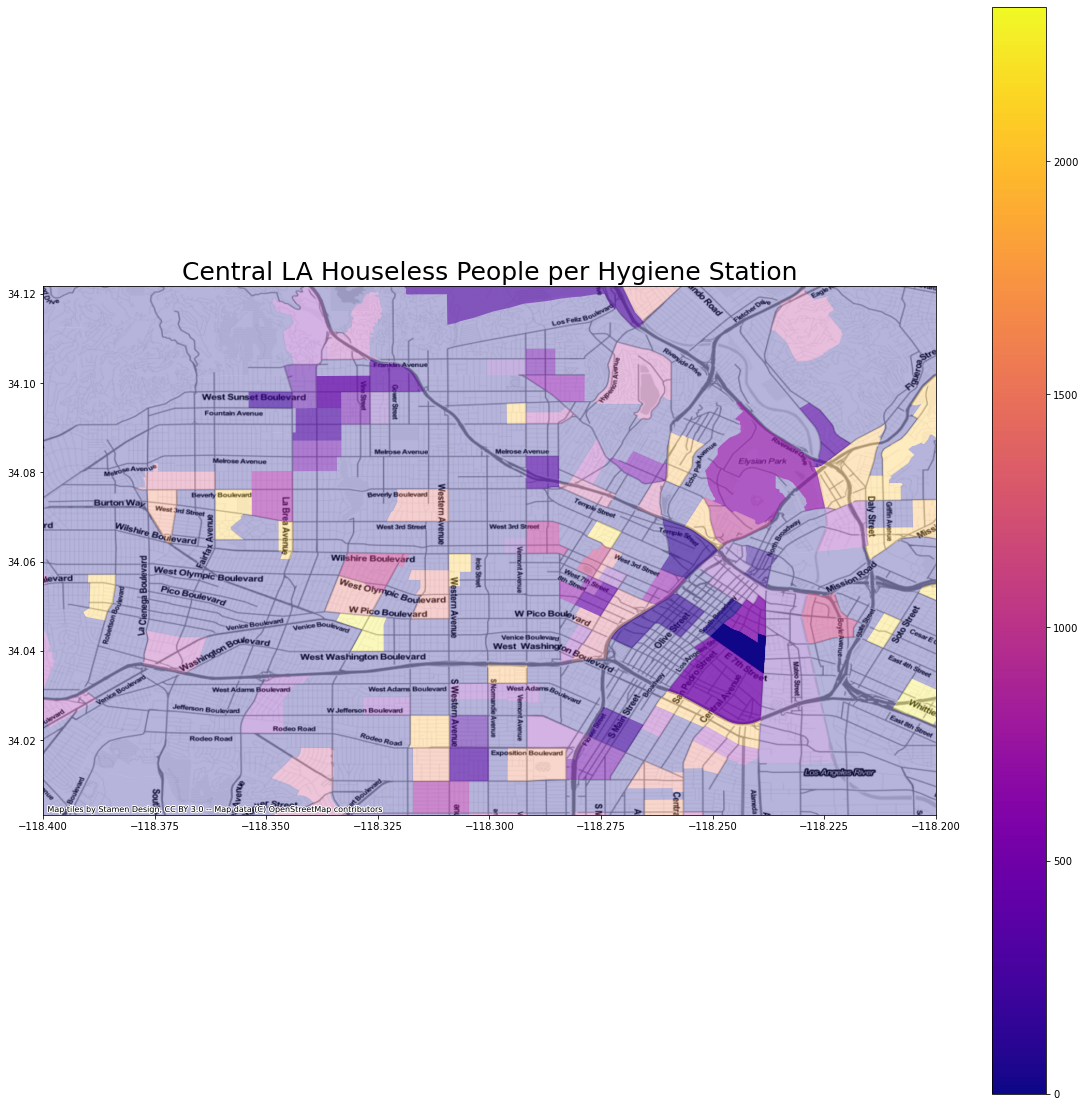

In [80]:
# Central LA 

f, ax = plt.subplots(figsize=(20,20))

joinedGdf3.plot('toilet_ratio', 
            ax=ax, 
            cmap='plasma', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')
ax.set_xlim([-118.40, -118.20]) 
ax.set_ylim([34.003307, 34.121767])
ax.set_title('Central LA Houseless People per Hygiene Station', fontsize=25)

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

plt.show()